In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore") 

In [3]:
stock_data = yf.download("AAPL",start = "2024-01-01")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.532089,187.315382,182.792533,186.033072,82488700
2024-01-03,183.150360,184.770637,182.335247,183.120540,58414500
2024-01-04,180.824356,181.997307,179.800504,181.062914,71983600
2024-01-05,180.098694,181.669266,179.094727,180.903872,62303300
2024-01-08,184.452560,184.492330,180.416793,181.003268,59144500


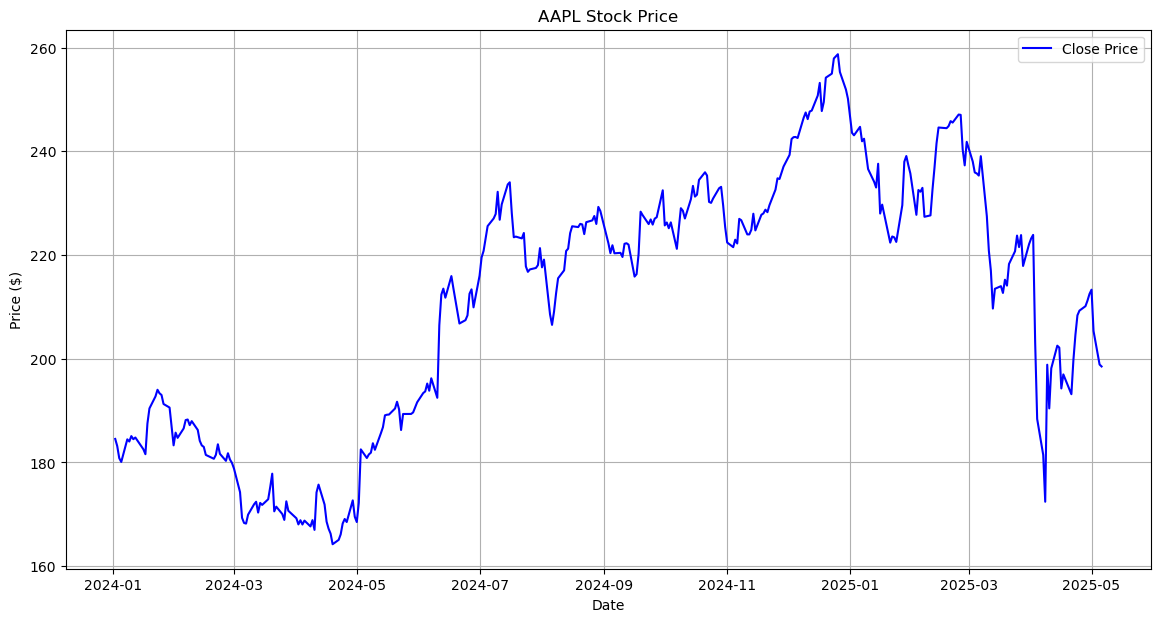

In [6]:
plt.figure(figsize=(14,7))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='blue')
plt.title('AAPL Stock Price')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid()
plt.show()

### Classical Time Series Decomposition

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [11]:
decompositon_additive = seasonal_decompose(stock_data['Close'], model='additive', period=30)

In [12]:
trend_additive = decompositon_additive.trend
seasonal_additive = decompositon_additive.seasonal
residual_additive = decompositon_additive.resid

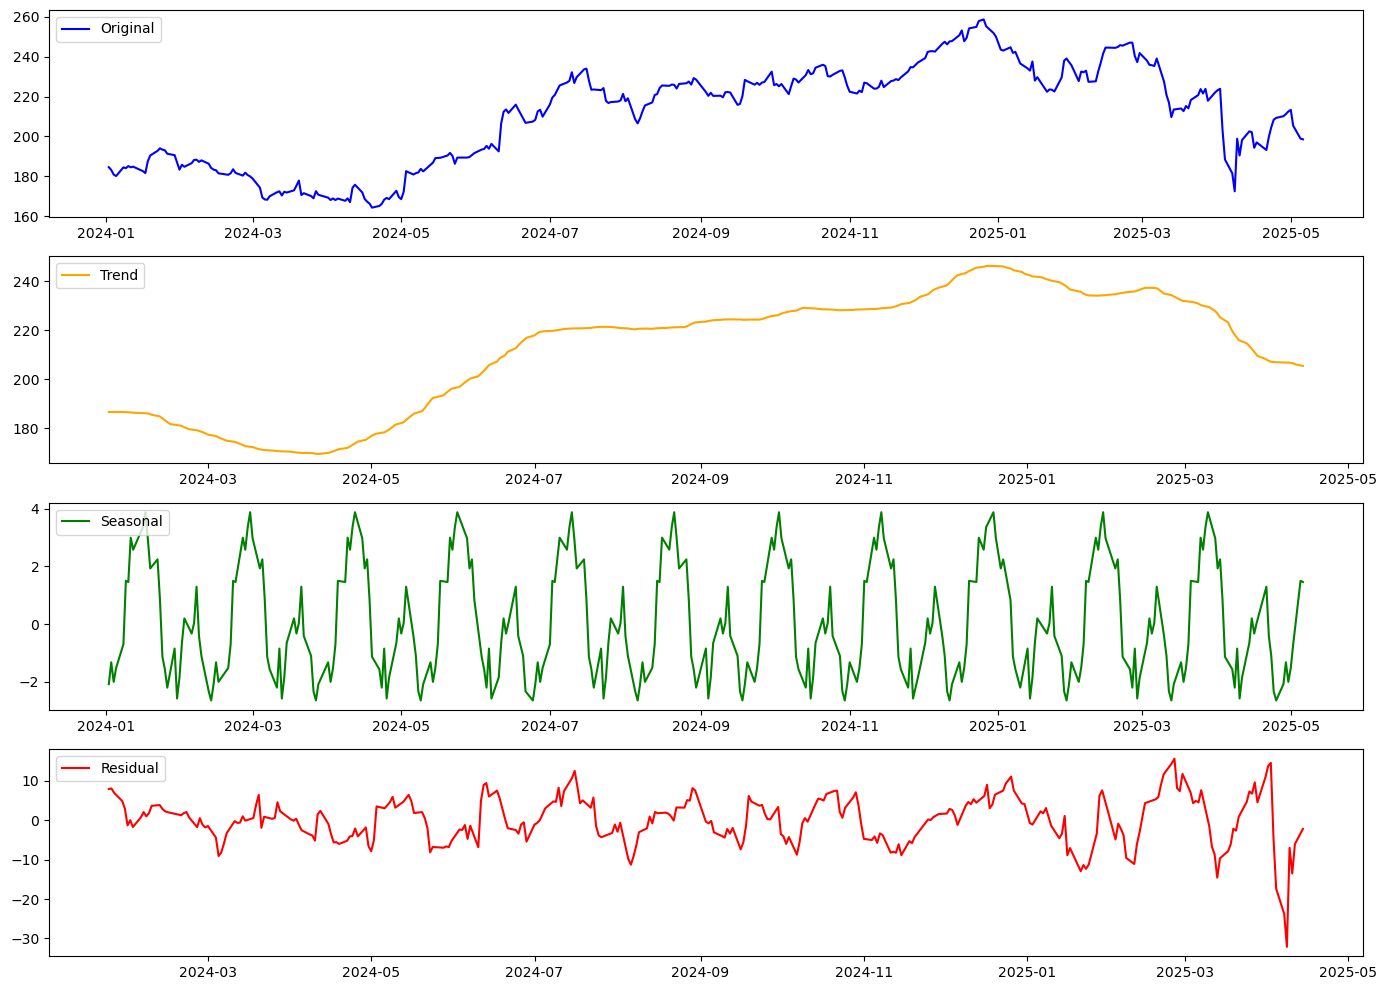

In [13]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(stock_data['Close'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend_additive, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal_additive, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual_additive, label='Residual', color='red')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### STL Decomposition (Seasonal-Trend decomposition using LOESS)

In [16]:
from statsmodels.tsa.seasonal import STL

In [20]:
# Perform STL decomposition
stl = STL(stock_data['Close'], period= 30)
result = stl.fit()

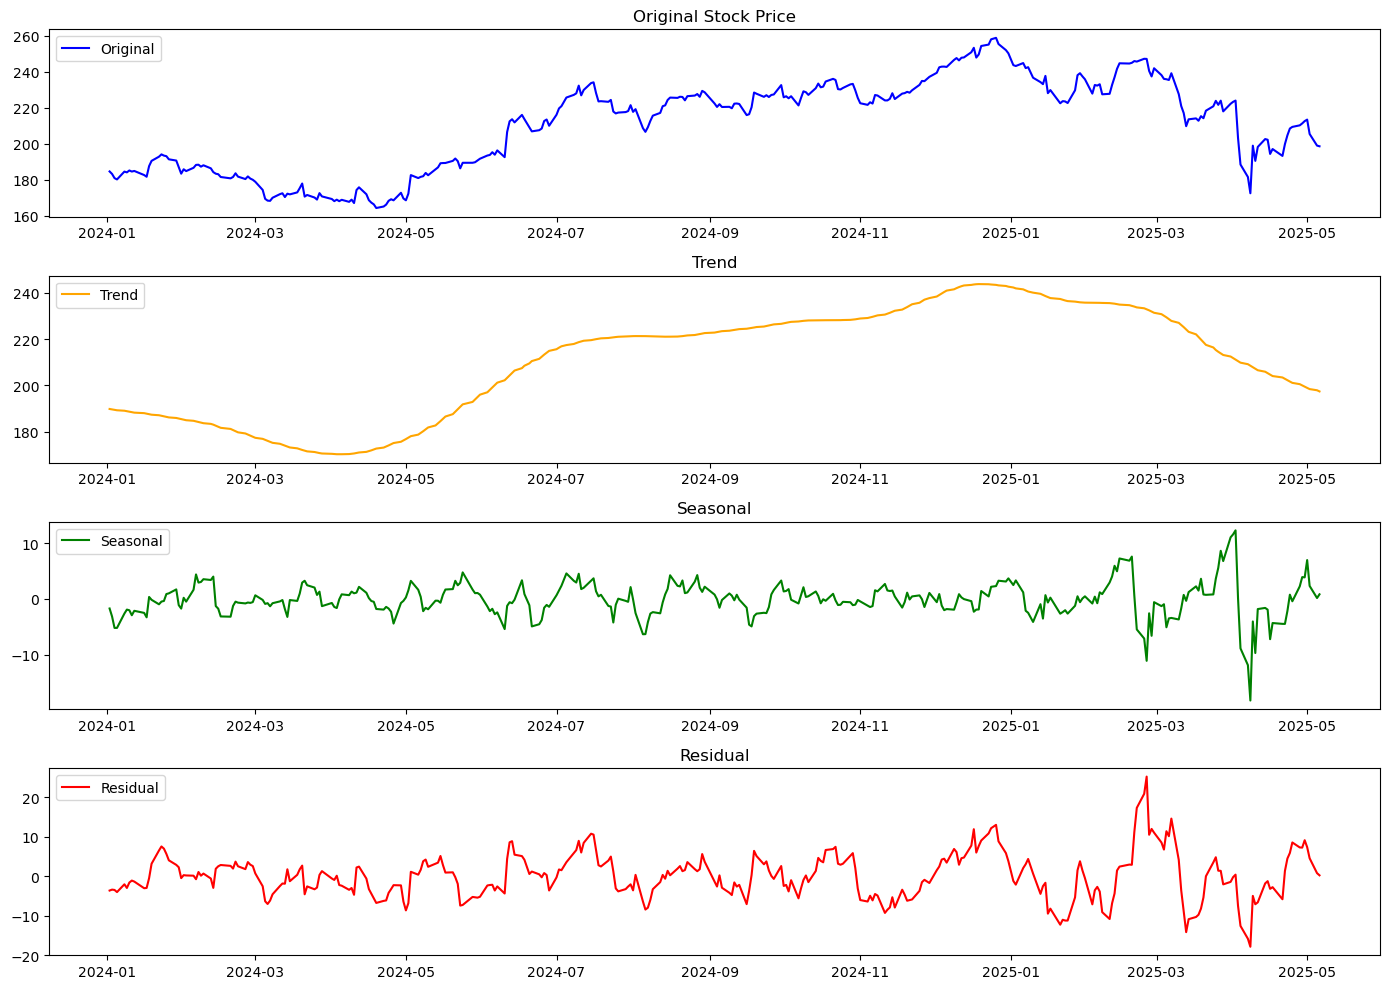

In [21]:
# plot the results
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(stock_data['Close'], label='Original', color='blue')
plt.title('Original Stock Price')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result.trend, label='Trend', color='orange')
plt.title('Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color='green')
plt.title('Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result.resid, label='Residual', color='red')
plt.title('Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()